# **Linear Regression I**

---

### **Introduction**
This notebook goes over the basics of linear regression.

---

### **Author**
**Junichi Koganemaru**  

---

### **References**
1. Elements of Statistical Learning by Trevor Hastie, Robert Tibshirani, and Jerome Friedman.
2. Introduction to Statistical Learning by Gareth James, Daniela Witten, Trevor Hastie, and Robert Tibshirani.
3. All of Statistics: A Concise Course in Statistical Inference by Larry Wasserman.

---

### **Recommended Reading and Resources**

1. [Linear Regression](https://en.wikipedia.org/wiki/Linear_regression)
2. [Ordinary Least Squares](https://en.wikipedia.org/wiki/Ordinary_least_squares)
3. [Proofs involving ordinary least squares](https://en.wikipedia.org/wiki/Ordinary_least_squares#Proofs_involving_ordinary_least_squares)

---

### **Last Updated**
**January 26, 2025**

In [5]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import t, norm

## Simple linear regression

We start by discussing the most basic regression model, the *simple linear regression model*. In this model, there is a single predictor $x$ that is used to predict a target variable $y$. 

The relationship between $x$ and $y$ is assumed to be linear, and is given by the equation

$$ y_i = \beta_0 + \beta_1 x_i + \varepsilon_i, \; 1 \le i \le n$$

where $y_i$ is the target variable for the $i$-th observation, $x_i$ is the predictor for the $i$-th observation, $\beta_0$ is the *intercept*, and $\beta_1$ is the *slope*. $\varepsilon_i: \Omega \to \mathbb{R}$ in this setting is a random variable that represents the *irreducible error* in the model.

In matrix-vector form, one can write this as 
$$
\boldsymbol{y} = X \boldsymbol{\beta} + \boldsymbol{\varepsilon}
$$
for 
$$
\boldsymbol{y} = \begin{pmatrix} y_1 \\ y_2 \\ \vdots \\ y_n \end{pmatrix}, \quad X = \begin{pmatrix} 1 & x_1 \\ 1 & x_2 \\ \vdots & \vdots \\ 1 & x_n \end{pmatrix}, \quad \boldsymbol{\beta} = \begin{pmatrix} \beta_0 \\ \beta_1 \end{pmatrix}, \quad \boldsymbol{\varepsilon} = \begin{pmatrix} \varepsilon_1 \\ \varepsilon_2 \\ \vdots \\ \varepsilon_n \end{pmatrix}.
$$

Note that without the error term $\boldsymbol{\varepsilon} :\Omega \to \mathbb{R}^n$, this is something we can study in pure linear algebraic terms, and we have seen that the "best" solution is the least squares solution and can be written down explictly. With the error term, we need to make some assumptions about the error term to proceed.

The typical assumptions on $\boldsymbol{\varepsilon}$ are the following:
1. $\mathbb{E}[\boldsymbol{\varepsilon}] = \boldsymbol{0}$.
2. $\text{Cov}(\boldsymbol{\varepsilon}) = \sigma^2 \boldsymbol{I}$. This means that $\text{Var}(\varepsilon_i) = \sigma^2$ for all $i$ and that the errors are uncorrelated. The constant variance assumption is referred to as *homoscedasticity* in statistics. 

Additional assumptions can be made that lead to stronger results. A typical assumption is that $\boldsymbol{\varepsilon}$ is normally distributed.

**Remark:** In finance, the model is typically written as $y_i = \alpha + \beta x_i + \varepsilon_i$. This notation is the origin of the term [*beta*](https://en.wikipedia.org/wiki/Beta_(finance)) for stocks.

## Estimation of the parameters

Given a sample of $n$ observations, we can estimate the parameters $\beta_0$ and $\beta_1$ through statistical inference. The notation for their estimators are $\hat{\beta}_0$ and $\hat{\beta}_1$. The *fitted values* are given by $\hat{y}_i = \hat{\beta}_0 + \hat{\beta}_1 x_i$, and the *residuals* are given by $\hat{\varepsilon}_i = y_i - \hat{y}_i$. In matrix-vector notation,
$$ 
\hat{\boldsymbol{y}} = X \hat{\boldsymbol{\beta}}, \quad \hat{\boldsymbol{\varepsilon}} = \boldsymbol{y} - \hat{\boldsymbol{y}} = \boldsymbol{y} -  X \hat{\boldsymbol{\beta}} .
$$

## Sample covariance and correlation

Recall that the covariance and the correlation of two random variables can be used to measure the linear relationship between them. Given two random variables $X,Y: \Omega \to \mathbb{R}$, the covariance is defined via
$$
\text{Cov}(X,Y) = \mathbb{E}[(X - \mathbb{E}[X])(Y - \mathbb{E}[Y])],
$$
and the correlation is defined via
$$
\text{Corr}(X,Y) = \frac{\text{Cov}(X,Y)}{\sqrt{\text{Var}(X) \text{Var}(Y)}}.
$$
In regression models, since we are working with a sample, we use the *sample covariance* and *sample correlation* to estimate these values. The sample covariance is defined via
$$
s_{xy} = \frac{1}{n-1} \sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y}),
$$
and the sample correlation is defined via
$$
r_{xy} = \frac{s_{xy}}{s_x s_y},
$$
where $s_x$ and $s_y$ are the *sample standard deviations* of $x$ and $y$, respectively. Note that for $r_{xy}$ to be well-defined, $s_x$ and $s_y$ must be non-zero. 

The sample standard deviation can be found through taking the square root of the sample variance, which is defined via 
$$
s_x^2 = \frac{1}{n-1} \sum_{i=1}^n (x_i - \bar{x})^2.
$$
In practice, the sample correlation is referred to as the [*sample Pearson correlation coefficient*](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient) and is denoted by $r$

**Remark:** Note that everything here is Bessel corrected, which is slightly different from the convention used on Homework 1. However, by scaling the formula for $r$ is still same.


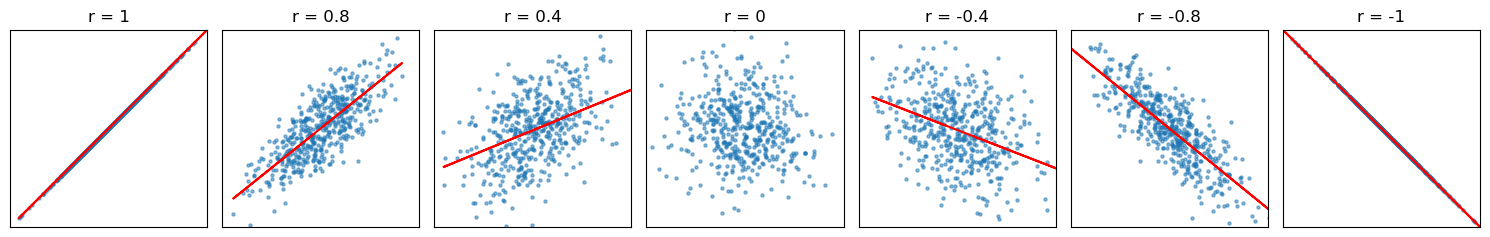

In [6]:
r_values = [1, 0.8, 0.4, 0, -0.4, -0.8, -1]


fig, axes = plt.subplots(1, len(r_values), figsize=(15, 3))

for ax, r in zip(axes, r_values):
    mean = [0, 0]
    cov = [[1, r], [r, 1]] 
    x, y = np.random.multivariate_normal(mean, cov, 500).T 

    ax.scatter(x, y, alpha=0.5, s=5)
    ax.set_title(f'r = {r}')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlim(-3, 3)
    ax.set_ylim(-3, 3)
    ax.set_aspect('equal', adjustable='box')

    if r != 0:
        slope = r * (np.std(y) / np.std(x))
        intercept = np.mean(y) - slope * np.mean(x)
        ax.plot(x, slope * x + intercept, color='red')

plt.tight_layout()
plt.show()

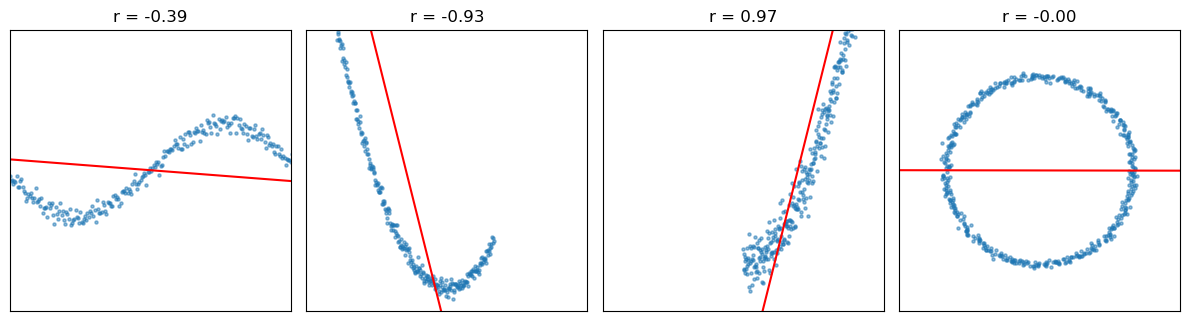

In [7]:
num_samples = 500

def oscillating():
    x = np.linspace(-2*np.pi, 2*np.pi, num_samples)
    y = np.sin(x) + np.random.normal(0, 0.1, num_samples)
    return x, y

def parabola():
    x = np.linspace(-2, 4, num_samples) - 3
    y = x**2 + np.random.normal(0, 0.1, num_samples) - 2.5
    return x, y

def parabola2():
    x = np.linspace(-2, 2, num_samples) + 2
    y = x**2 + 3* np.random.normal(0, 0.1, num_samples) - 2
    return x, y


def circle():
    theta = np.linspace(0, 2*np.pi, num_samples)
    x = 2 * np.cos(theta) + np.random.normal(0, 0.05, num_samples)
    y = 2 * np.sin(theta) + np.random.normal(0, 0.05, num_samples)
    return x, y

func = [oscillating, parabola, parabola2, circle]

fig, axes = plt.subplots(1, len(func), figsize=(12, 6))

for ax, pattern in zip(axes, func):
    x, y = pattern()
    r_value = np.corrcoef(x, y)[0, 1]
    
    ax.scatter(x, y, alpha=0.5, s=5)
    ax.set_title(f"r = {r_value:.2f}")
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_aspect('equal', adjustable='box')
    ax.set_xlim(-3, 3)
    ax.set_ylim(-3, 3)
    
    slope, intercept = np.polyfit(x, y, 1)
    x_line = np.linspace(-3, 3, 100)
    ax.plot(x_line, slope * x_line + intercept, color='red')

plt.tight_layout()
plt.show()


Note that the correlation coefficient is only a measure of the strength of the *linear* relationship between two random variables. If the underlying relationship is not linear, then the correlation coefficient is a useful metric. In other words, having a high $|r|$ does not imply necessarily imply that the underlying relationship is linear and the linear model is a good fit.

## Maximum likelihood estimation

Given the normality assumptions on the error term $\boldsymbol{\varepsilon}$, we can derive the maximum likelihood estimators for $\beta_0$ and $\beta_1$. Assume $\boldsymbol{\varepsilon} \sim N(\boldsymbol{0}, \sigma^2 I )$. Then the log-likelihood function $l: \mathbb{R}^3 \to \mathbb{R}$ is given by 
$$
l(\beta_0, \beta_1, \sigma^2) = -\frac{n}{2} \log(2\pi) - \frac{n}{2} \log(\sigma^2) - \frac{1}{2\sigma^2} \sum_{i=1}^n (y_i - \beta_0 - \beta_1 x_i)^2.
$$
Suppose $\sigma^2$ is fixed. We note that maximizing the log-likelihood function is equivalent to minimizing the *residual sum of squares (RSS)*, which is the function $\text{RSS}: \mathbb{R}^2 \to \mathbb{R}$ given by
$$
\text{RSS}(\beta_0, \beta_1) = \sum_{i=1}^n (y_i - \beta_0 - \beta_1 x_i)^2.
$$
Note that this is just the Euclidean distance between the vector $\boldsymbol{y}$ and the vector $X \boldsymbol{\beta}$. From standard linear algebra, we know that the least squares solution with minimum Euclidean norm is given by
$$
\hat{\boldsymbol{\beta}} = (X)^+ \boldsymbol{y},
$$
where $X^+$ is the Moore-Penrose pseudoinverse of $X$. On the homework, we saw that by assuming $s_x \neq 0$, we have 
$$
\hat{\beta}_0 = \bar{y} - \hat{\beta}_1 \bar{x}, \quad \hat{\beta}_1 = \frac{s_{xy}}{s_x^2} = r_{xy} \frac{s_y}{s_x}
$$
Note that assuming $s_x \neq 0$ is equivalent to assuming that $X$ has full column rank in our setting, so the least squares solution can be written as 
$$
\hat{\boldsymbol{\beta}} = (X^T X)^{-1} X^T \boldsymbol{y}
$$ 
under the assumption that $s_x \neq 0$.

Here we give an alternative derivation using calculus. We note that 
$$
\frac{\partial \text{RSS}}{\partial \beta_0} (\beta_0, \beta_1) = -2 \sum_{i=1}^n (y_i - \beta_0 - \beta_1 x_i), \; \frac{\partial \text{RSS}}{\partial \beta_1} (\beta_0, \beta_1) = -2 \sum_{i=1}^n x_i (y_i - \beta_0 - \beta_1 x_i).
$$
Then
$$
\frac{\partial \text{RSS}}{\partial \beta_0} (\beta_0, \beta_1) = 0 \implies \beta_0 = \bar{y} - \beta_1 \bar{x}, \quad \frac{\partial \text{RSS}}{\partial \beta_1} (\beta_0, \beta_1) = 0 \implies \beta_1 = \frac{s_{xy}}{s_x^2}.
$$
To verify that these are minimizers (or even correspond to extrema), we need to analyze the *Hessian matrix* of $\text{RSS}$; we will discuss this in a separate notebook on matrix calculus. For now, you can assume that these are the minimizers. This shows the MLE of $\beta_0$ and $\beta_1$ are the least squares estimators. In particular, this shows that the least squares estimators enjoys all the asymptotic properties of MLEs.

**Remark:** Common misconception: if you reverse the roles of $x$ and $y$ (regressing $x$ over $y$ instead of regressing $y$ over $x$), the new $\hat{\beta}_1$ is *not* the reciprocal of the old $\hat{\beta}_1$. Instead, the new slope is $r_{yx} \frac{s_x}{s_y} = r_{xy} \frac{s_x}{s_y}$.

## Estimating the variance of the error term

Given the normality assumptions on the error term $\boldsymbol{\varepsilon}$, we can derive the maximum likelihood estimator for $\sigma^2$. Assuming $\boldsymbol{\epsilon} \sim N(\boldsymbol{0}, \sigma^2 I)$, the log-likelihood function $l : \mathbb{R}^3 \to \mathbb{R}$ is given by
$$
l(\beta_0,\beta_1, \sigma^2) = -\frac{n}{2} \log(2\pi) - \frac{n}{2} \log(\sigma^2) - \frac{1}{2\sigma^2} \sum_{i=1}^n (y_i - \beta_0 - \beta_1 x_i)^2.
$$
Differentiating with respect to $\sigma^2$ gives us
$$
\frac{\partial l}{\partial \sigma^2} = -\frac{n}{2\sigma^2} + \frac{1}{2(\sigma^2)^2} \sum_{i=1}^n (y_i - \beta_0 - \beta_1 x_i)^2 = 0 \implies \sigma^2 = \frac{1}{n} \sum_{i=1}^n (y_i - \beta_0 - \beta_1 x_i)^2 = \frac{\text{RSS}(\beta_0,\beta_1)}{n}.
$$
One can check is a maximizer, therefore the MLE of $\sigma^2$ is 
$$
\hat{\sigma}^2_{\text{MLE}} = \frac{\text{RSS}(\hat{\beta}_0,\hat{\beta}_1)}{n}.
$$
This estimator is biased, however applying Bessel's correction gives us the unbiased estimator
$$
\hat{\sigma}^2 = \frac{\text{RSS}(\hat{\beta}_0,\hat{\beta}_1)}{n-2}.
$$
This is the estimator that is typically used in practice, including in many Python packages.

**Remark:** Here is some intuition as to why we use $n-2$ instead of $n-1$ or $n$. Note that $\hat{\boldsymbol{y}} = X \hat{\boldsymbol{\beta}}$ is a linear combination of the two columns of $X$, so $\hat{\boldsymbol{y}}$ lies in a two-dimensional subspace. The error vector $\boldsymbol{\varepsilon} = \boldsymbol{y} - \hat{\boldsymbol{y}}$ lives in the orthogonal complement, which is $n-2$ dimensional. This means that the error term has $n-2$ "degrees of freedom", so the normalization factor is $n-2$. In general, if the design matrix $X$ has $p+1$ columns, then the normalization factor is $n-p-1$.


## Inference on $\hat{\beta}_0$ and $\hat{\beta}_1$

Next we record some results on the distributions of $\hat{\beta}_0$ and $\hat{\beta}_1$. Under the normality assumption that $\boldsymbol{\varepsilon} \sim N(\boldsymbol{0}, \sigma^2 I)$, the following hold.

1. $\boldsymbol{\hat{\beta}}$ is an unbiased estimator of $\boldsymbol{\beta}$: this is because 
$$
\mathbb{E}[\boldsymbol{\hat{\beta}}] = \mathbb{E}[(X^T X)^{-1} X^T \boldsymbol{y}] =   \mathbb{E}[(X^T X)^{-1} X^T (X \boldsymbol{\beta} + \boldsymbol{\varepsilon})] = \boldsymbol{\beta} + \mathbb{E}[(X^T X)^{-1} X^T \boldsymbol{\varepsilon}] = \boldsymbol{\beta} + (X^T X)^{-1} X^T  \underbrace{\mathbb{E}[ \boldsymbol{\varepsilon}]}_{= \boldsymbol{0}}= \boldsymbol{\beta}.
$$
Here we treat $X$ as a fixed (non-random) matrix. 

2. $\boldsymbol{\hat{\beta}}$ is multivariate normal with distribution $N(\boldsymbol{\beta}, \sigma^2 (X^T X)^{-1}) \approx N(\boldsymbol{\beta}, \hat{\sigma}^2 (X^T X)^{-1})$. On the homework, we have shown that 
$$
\hat{\sigma}^2 (X^T X)^{-1} = \frac{\hat{\sigma}^2}{(n-1)s_x^2} \begin{pmatrix} \frac{1}{n} \sum_{i=1}^n x_i^2 & - \frac{1}{n}\sum_{i=1}^n x_i \\ -\frac{1}{n}\sum_{i=1}^n x_i & 1 \end{pmatrix}.
$$
In particular, this means that $\text{Var}(\hat{\beta}_1) \approx \frac{\hat{\sigma}^2}{(n-1)s_x^2}$, which implies that 
$$
\text{SE}(\hat{\beta}_1) = \sqrt{\text{Var}(\hat{\beta}_1)} \approx \sqrt{\frac{\hat{\sigma}^2}{(n-1)s_x^2}} = \frac{\hat{\sigma}}{\sqrt{n-1} \cdot s_x}.
$$
Using 
$$
\mathbb{P}(\hat{\beta}_1 - z_{\alpha/2} \text{SE}(\hat{\beta}_1) \le \beta_1 \le  \hat{\beta}_1 + z_{\alpha/2} \text{SE}(\hat{\beta}_1)) = 1 - \alpha,
$$
we can then construct a $100(1-\alpha)\%$ confidence interval for $\beta_1$, and similarly for $\beta_0$.


We note that even if the normality assumption is dropped, the least squares estimator is still unbiased and consistent. The normality assumption *is not essential*, but is useful for deriving the exact distribution of the estimators and to construct confidence intervals. Using the central limit theorem, for sufficiently large sample sizes we can still get approximate distributions for the estimators as long we assume the errors are i.i.d. with the same variance. 

## Coefficient of determination

The idea behind the **coefficient of determination** is to measure the proportion of the sum of squared errors accounted for by the model that has been fit, relative to a model with no predictors (a naive baseline model that uses the mean). The coefficient of determination is defined as
$$
R^2 = 1 - \frac{\sum_{i=1}^n (y_i - \hat{y}_i)^2 }{\sum_{i=1}^n (y_i - \bar{y})^2} =: 1 - \frac{\text{RSS}(\hat{\beta}_0, \hat{\beta}_1)}{\text{TSS}},
$$
Here $\text{TSS} = \sum_{i=1}^n (y_i - \bar{y})^2$ is the *total sum of squares*, which measures the total variance in the target variable. On the homework, we showed that in the simple linear regression model, $R^2 = r^2$ and they can both be interpreted in terms of the cosine of the angle between the vectors $\boldsymbol{y}$ and $\hat{\boldsymbol{y}}$. In multiple linear regression, the concept of correlation between predictors and the target does not generalize immediately, as correlation quantifies the linear relationship between two (not multiple) random variables. In this setting, $R^2$ essetially fulfills this role.


### Interpretation of $R^2$

$\text{TSS}$ is the variance in the target variable $\boldsymbol{y}$, and can be interpreted as the amount of variability in the data before regression is performed. $\text{RSS}$, the residual sum of squares, can be interpreted as the amount of variability in the data that is left unexplained after performing regression. $R^2$ then can be interpreted as the proportion of the variability in $\boldsymbol{y}$ that is explained by the predictors in $X$. A $R^2$ statistic close to 1 indicates that a large proportion of the variability in the target variable is explained by the predictors, while a $R^2$ statistic close to 0 indicates that the predictors do not explain much of the variability in the target variable. However, this interpretation is only valid if the underlying relationship is linear.

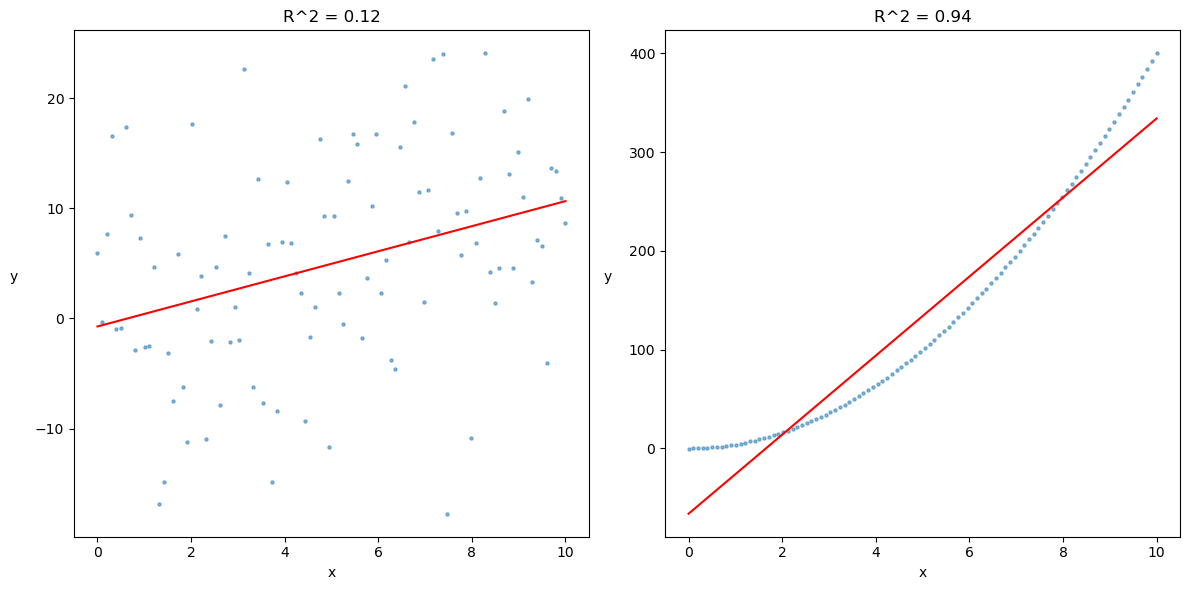

In [8]:
np.random.seed(42)

x1 = np.linspace(0, 10, 100)
y1 = x1 + 1 + np.random.normal(0, 10, 100) 

x2 = np.linspace(0, 10, 100)
y2 = 4*x2**2 + 0.01*np.random.normal(0, 10, 100)  

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].scatter(x1, y1, alpha=0.5, s=5)
slope1, intercept1 = np.polyfit(x1, y1, 1)
axes[0].plot(x1, slope1 * x1 + intercept1, color='red')
axes[0].set_title(f'R^2 = {np.corrcoef(x1, y1)[0, 1]**2:.2f}')
axes[0].set_xlabel('x')
axes[0].set_ylabel('y', rotation=0, labelpad=15)

axes[1].scatter(x2, y2, alpha=0.5, s=5)
slope2, intercept2 = np.polyfit(x2, y2, 1)
axes[1].plot(x2, slope2 * x2 + intercept2, color='red')
axes[1].set_title(f'R^2 = {np.corrcoef(x2, y2)[0, 1]**2:.2f}')
axes[1].set_xlabel('x')
axes[1].set_ylabel('y', rotation=0, labelpad=15)

plt.tight_layout()
plt.show()

In practice, $R^2$ is often used as a measure of the goodness of fit of a model. However, one must proceed with caution, as it is possible for a model to achieve a high $R^2$ score even if the model is not a good fit. 

*If the model is a good fit*, then $R^2$ can be used a metric to quantify the predictive power of the model. 

To read more about interpretations of $R^2$, see the discussion [here](https://en.wikipedia.org/wiki/Coefficient_of_determination#Interpretation).

In ``scikit-learn``, the $R^2$ statistic can be calculated by calling ``sklearn.metrics.r2_score``. Below we give a quick demonstration.

In [9]:
X, y = load_diabetes(return_X_y=True)
X = X[:, 8].reshape(-1, 1)

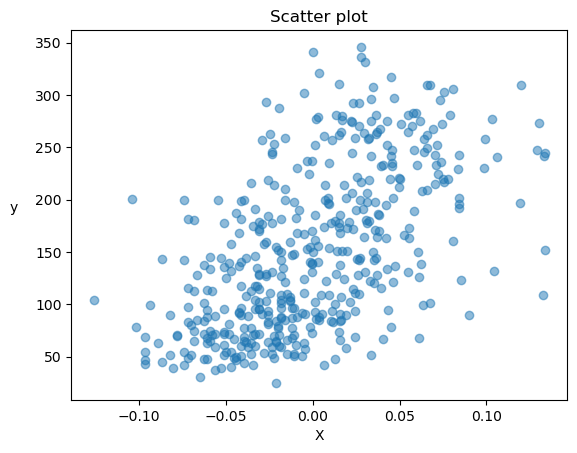

In [10]:
plt.scatter(X, y, alpha=0.5)
plt.xlabel('X')
plt.ylabel('y', rotation = 0, labelpad=15)
plt.title('Scatter plot')
plt.show()

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

In [12]:
reg = LinearRegression(fit_intercept=True)

In [13]:
reg.fit(X_train, y_train)

LinearRegression()

In [14]:
print(f"beta_0: {reg.intercept_}, beta_1: {reg.coef_[0]}")

beta_0: 152.64058957495075, beta_1: 901.2343423727187


In [15]:
y_pred = reg.predict(X_test)

print(f"MSE on test data: {mean_squared_error(y_test, y_pred):.2f}")
print(f"Coefficient of determination: {r2_score(y_test, y_pred):.2f}")

MSE on test data: 3270.59
Coefficient of determination: 0.38


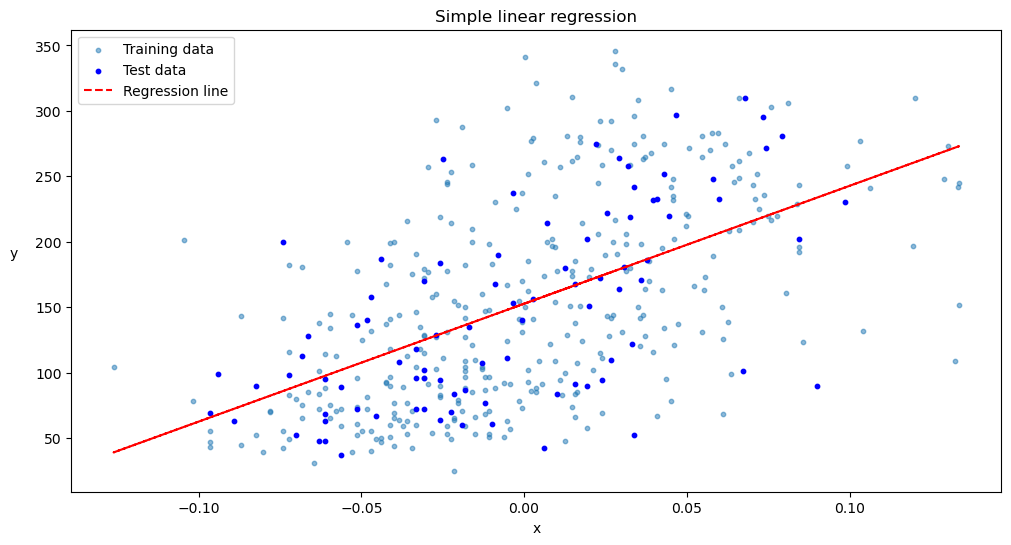

In [16]:
plt.figure(figsize=(12, 6))

plt.scatter(X_train, y_train, alpha=0.5, s = 10, label='Training data')
plt.scatter(X_test, y_test, color='blue', s= 10, label='Test data')
plt.plot(X_train, reg.predict(X_train), color='red', linestyle= 'dashed', label='Regression line')

plt.xlabel('x')
plt.ylabel('y', rotation=0, labelpad=15)
plt.title('Simple linear regression')
plt.legend()
plt.show()

We will go over other diagnostic measures to assess the quality of the regression model.

## Multiple linear regression


In the multiple linear regression model, we assume there are $p$ predictors $x_1, x_2, \ldots, x_p$ that are used to predict a target variable $y$. The relationship between the predictors and the target variable is assumed to be linear, and is given by 
$$
y_i = \beta_0 + \beta_1 x_{i1} + \beta_2 x_{i2} + \cdots + \beta_p x_{ip} + \varepsilon_i, \; 1 \le i \le n.
$$
We make the same assumptions on the error term $\boldsymbol{\varepsilon}$ as in the simple linear regression model. In matrix-vector form, we can write this as
$$
\boldsymbol{y} = X \boldsymbol{\beta} + \boldsymbol{\varepsilon},
$$
for 
$$
\boldsymbol{y} = \begin{pmatrix} y_1 \\ y_2 \\ \vdots \\ y_n \end{pmatrix}, \quad X = \begin{pmatrix} 1 & x_{11} & x_{12} & \cdots & x_{1p} \\ 1 & x_{21} & x_{22} & \cdots & x_{2p} \\ \vdots & \vdots & \vdots & \vdots & \vdots \\ 1 & x_{n1} & x_{n2} & \cdots & x_{np} \end{pmatrix}, \quad \boldsymbol{\beta} = \begin{pmatrix} \beta_0 \\ \beta_1 \\ \vdots \\ \beta_p \end{pmatrix}, \quad \boldsymbol{\varepsilon} = \begin{pmatrix} \varepsilon_1 \\ \varepsilon_2 \\ \vdots \\ \varepsilon_n \end{pmatrix}.
$$

From standard linear algebra, we know that the least squares solution is given by
$$
\hat{\boldsymbol{\beta}} = X^+ \boldsymbol{y},
$$
where $X^+$ is the Moore-Penrose pseudoinverse of $X$. In the case where $X$ has full column rank (no *multicollinearity*), we have
$$
\hat{\boldsymbol{\beta}} = (X^T X)^{-1} X^T \boldsymbol{y}.
$$

Here we give an alternative derivation using calculus. We note that under the normality assumption on the error term $\boldsymbol{\varepsilon}$, the log-likelihood function $l: \mathbb{R}^{p+2} \to \mathbb{R}$ is given by
$$
l(\beta_0, \ldots , \beta_p, \sigma^2) = -\frac{n}{2} \log(2\pi) - \frac{n}{2} \log(\sigma^2) - \frac{1}{2\sigma^2} \sum_{i=1}^n (y_i - (\beta_0 + \beta_1 x_{i1} + \cdots + \beta_p x_{ip}))^2.
$$
We note again that maximizing the log-likelihood function is equivalent to minimizing the residual sum of squares (RSS), which is the function $\text{RSS}: \mathbb{R}^{p+1} \to \mathbb{R}$ given by
$$
\text{RSS}(\beta_0, \ldots, \beta_p) = \sum_{i=1}^n (y_i - (\beta_0 + \beta_1 x_{i1} + \cdots + \beta_p x_{ip}))^2.
$$
Here it is better to write this in vector form as
$$
\text{RSS}(\boldsymbol{\beta}) = \|\boldsymbol{y} - X \boldsymbol{\beta}\|^2 = (\boldsymbol{y} - X \boldsymbol{\beta})^T (\boldsymbol{y} - X \boldsymbol{\beta}).
$$
We will justify the product rule for taking derivatives with respect to vectors in a separate notebook on matrix calculus. For now, you can assume that this is the correct:
$$
\frac{\partial \text{RSS}}{\partial \boldsymbol{\beta}} = \frac{\partial}{\partial \boldsymbol{\beta}} \left[ (\boldsymbol{y} - X \boldsymbol{\beta})^T \right] (\boldsymbol{y} - X \boldsymbol{\beta}) + (\boldsymbol{y} - X \boldsymbol{\beta})^T  \frac{\partial}{\partial \boldsymbol{\beta}}  \left[ (\boldsymbol{y} - X \boldsymbol{\beta}) \right] = - X^T (\boldsymbol{y} - X \boldsymbol{\beta}) + (\boldsymbol{y} - X \boldsymbol{\beta})^T (-X) = - X^T (\boldsymbol{y} - X \boldsymbol{\beta}) - X^T (\boldsymbol{y} - X \boldsymbol{\beta}) = -2 X^T (\boldsymbol{y} - X \boldsymbol{\beta}).
$$
Setting this equal to the zero vector then gives us 
$$
X^T (\boldsymbol{y} - X \boldsymbol{\beta}) = \boldsymbol{0} \Longleftrightarrow X^T \boldsymbol{y} = X^T X \boldsymbol{\beta},
$$
and one can verify by analzying the Hessian matrix that this indeed gives us a minimizer. 

**Remark:** While the linear algebraic way of deriving the least squares estimator is more intuitive, the calculus-based method is more general. In machine learning, the loss function is not always based on the Euclidean norm, so the nice notions of orthogonality from linear algebra breaks down; the calculus-based method however can still be applied. Furthermore, gradient-based optimization methods are the standard methods in machine learning for finding minimizers.

**Remark:** In statistics and machine learning, the projection matrix $P = X (X^T X)^{-1} X^T$ is often called the *hat matrix*, and the diagonal entries of $P$ are called *leverages*.

e have
$$
\hat{\boldsymbol{\beta}} = (X^T X)^{-1} X^T \boldsymbol{y}.
$$

Here we give an alternative derivation using calculus. We note that under the normality assumption on the error term $\boldsymbol{\varepsilon}$, the log-likelihood function $l: \mathbb{R}^{p+2} \to \mathbb{R}$ is given by
$$
l(\beta_0, \ldots , \beta_p, \sigma^2) = -\frac{n}{2} \log(2\pi) - \frac{n}{2} \log(\sigma^2) - \frac{1}{2\sigma^2} \sum_{i=1}^n (y_i - (\beta_0 + \beta_1 x_{i1} + \cdots + \beta_p x_{ip}))^2.
$$
We note again that maximizing the log-likelihood function is equivalent to minimizing the residual sum of squares (RSS), which is the function $\text{RSS}: \mathbb{R}^{p+1} \to \mathbb{R}$ given by
$$
\text{RSS}(\beta_0, \ldots, \beta_p) = \sum_{i=1}^n (y_i - (\beta_0 + \beta_1 x_{i1} + \cdots + \beta_p x_{ip}))^2.
$$
Here it is better to write this in vector form as
$$
\text{RSS}(\boldsymbol{\beta}) = \|\boldsymbol{y} - X \boldsymbol{\beta}\|^2 = (\boldsymbol{y} - X \boldsymbol{\beta})^T (\boldsymbol{y} - X \boldsymbol{\beta}).
$$
We will justify the product rule for taking derivatives with respect to vectors in a separate notebook on matrix calculus. For now, you can assume that this is the correct:
$$
\frac{\partial \text{RSS}}{\partial \boldsymbol{\beta}} = \frac{\partial}{\partial \boldsymbol{\beta}} \left[ (\boldsymbol{y} - X \boldsymbol{\beta})^T \right] (\boldsymbol{y} - X \boldsymbol{\beta}) + (\boldsymbol{y} - X \boldsymbol{\beta})^T  \frac{\partial}{\partial \boldsymbol{\beta}}  \left[ (\boldsymbol{y} - X \boldsymbol{\beta}) \right] = - X^T (\boldsymbol{y} - X \boldsymbol{\beta}) + (\boldsymbol{y} - X \boldsymbol{\beta})^T (-X) = - X^T (\boldsymbol{y} - X \boldsymbol{\beta}) - X^T (\boldsymbol{y} - X \boldsymbol{\beta}) = -2 X^T (\boldsymbol{y} - X \boldsymbol{\beta}).
$$
Setting this equal to the zero vector then gives us 
$$
X^T (\boldsymbol{y} - X \boldsymbol{\beta}) = \boldsymbol{0} \Longleftrightarrow X^T \boldsymbol{y} = X^T X \boldsymbol{\beta},
$$
and one can verify by analzying the Hessian matrix that this indeed gives us a minimizer. 

**Remark:** While the linear algebraic way of deriving the least squares estimator is more intuitive, the calculus-based method is more general. In machine learning, the loss function is not always based on the Euclidean norm, so the nice notions of orthogonality from linear algebra breaks down; the calculus-based method however can still be applied. 

**Remark:** In statistics and machine learning, the projection matrix $P = X (X^T X)^{-1} X^T$ is often called the *hat matrix*, and the diagonal entries of $P$ are called *leverages*.

## Inference

Assuming $\boldsymbol{\varepsilon} \sim N(\boldsymbol{0}, \sigma^2 I)$, the following hold.

1. $\boldsymbol{\hat{\beta}}$ is the MLE and an unbiased estimator of $\boldsymbol{\beta}$.

2. $\boldsymbol{y} \sim N(X \boldsymbol{\beta}, \sigma^2 I)$.

3. $\boldsymbol{\hat{\beta}} \sim N(\boldsymbol{\beta}, \sigma^2 (X^T X)^{-1}) \approx N(\boldsymbol{\beta}, \hat{\sigma}^2 (X^T X)^{-1})$.

4. $\boldsymbol{\hat{\boldsymbol{y}}} \sim N(X \boldsymbol{\beta}, \sigma^2 P) \approx N(X \boldsymbol{\beta}, \hat{\sigma}^2 P) $.

5. $\boldsymbol{\hat{\boldsymbol{\varepsilon}}} \sim N(\boldsymbol{0}, \sigma^2 (I - P)) \approx  N(\boldsymbol{0},\hat{\sigma}^2(I - P))$.

6. The unbiased estimator for $\sigma^2$ is 
$$
\hat{\sigma}^2 = \frac{\text{RSS}(\hat{\boldsymbol{\beta}})}{n-p-1}.
$$

7. The statistic 
$$
t  = \frac{\beta_j - \hat{\beta}_j}{\text{SE}(\hat{\beta}_j)}
$$ 
is $t$-distributed with $n-p-1$ degrees of freedom, where $\text{SE}(\hat{\beta}_j)$ is the standard error of $\hat{\beta}_j$. A 100(1-$\alpha$)% confidence interval for $\beta_j$ can then be constructed as $(\hat{\beta}_j - t_{\alpha/2, n-p-1} \text{SE}(\hat{\beta}_j), \hat{\beta}_j + t_{\alpha/2, n-p-1} \text{SE}(\hat{\beta}_j))$.

8. For sufficiently large $n$, by the central limit theorem, the distribution of $t$ is approximately normal, therefore an approximate $100(1-\alpha)\%$ confidence interval for $\beta_j$ is $(\hat{\beta}_j - z_{\alpha/2} \text{SE}(\hat{\beta}_j), \hat{\beta}_j + z_{\alpha/2} \text{SE}(\hat{\beta}_j))$.

We note that a random variable is $t$-distributed with $k$ degrees of freedom if it is the ratio of a standard normal random variable and the square root of a chi-squared random variable with $k$ degrees of freedom. The density function of a $t$-distributed random variable is given by 
$$
f(x; k) = \frac{\Gamma((k+1)/2)}{\sqrt{k\pi} \Gamma(k/2)} \left(1 + \frac{x^2}{k} \right)^{-(k+1)/2}, \quad x \in \mathbb{R}.
$$

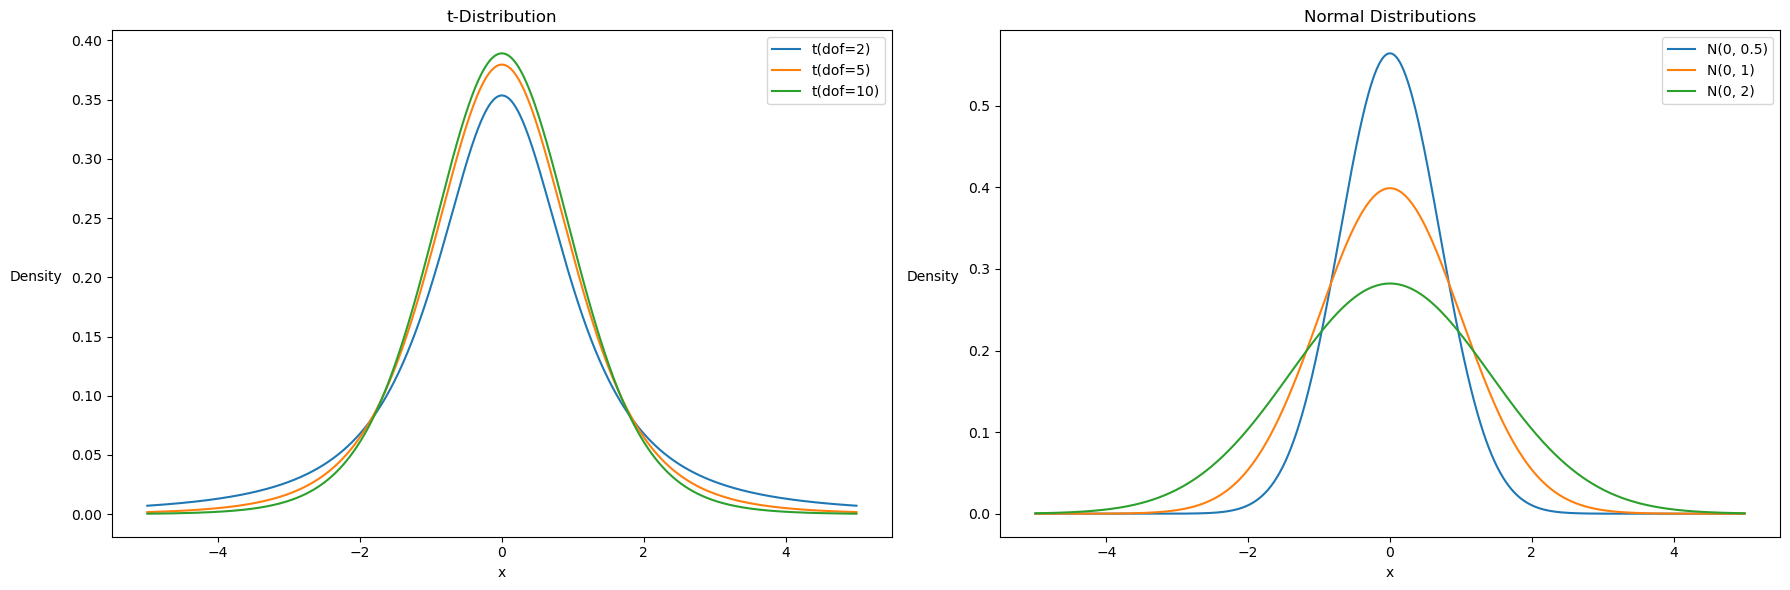

In [17]:
dof_t = [2, 5, 10]  
x_t = np.linspace(-5, 5, 1000)

fig, axes = plt.subplots(1, 2, figsize=(18, 6))

for df_t in dof_t:
    y_t = t.pdf(x_t, df_t)
    axes[0].plot(x_t, y_t, label=f't(dof={df_t})')

axes[0].set_title('t-Distribution')
axes[0].set_xlabel('x')
axes[0].set_ylabel('Density', rotation=0, labelpad=25)
axes[0].legend()

variances = [0.5, 1, 2]
x_norm = np.linspace(-5, 5, 1000)

for var in variances:
    y_norm = norm.pdf(x_norm, scale=np.sqrt(var))
    axes[1].plot(x_norm, y_norm, label=f'N(0, {var})')

axes[1].set_title('Normal Distributions')
axes[1].set_xlabel('x')
axes[1].set_ylabel('Density', rotation=0, labelpad=25)
axes[1].legend()

plt.tight_layout()
plt.show()


## Diagonstic measures

### Anscombe's quartet

[Anscombe's quartet](https://en.wikipedia.org/wiki/Anscombe%27s_quartet) is a set of four datasets published in 1973 that have nearly identical linear regression statistics, but are qualitatively distinct. 

The main takeaway from this is that one should not rely solely on OLS statistics to assess the quality of a model. *Visualization* of the data can be a powerful tool for assessing the quality of a model.

As one can see below, only the first dataset is well-described by a linear model.

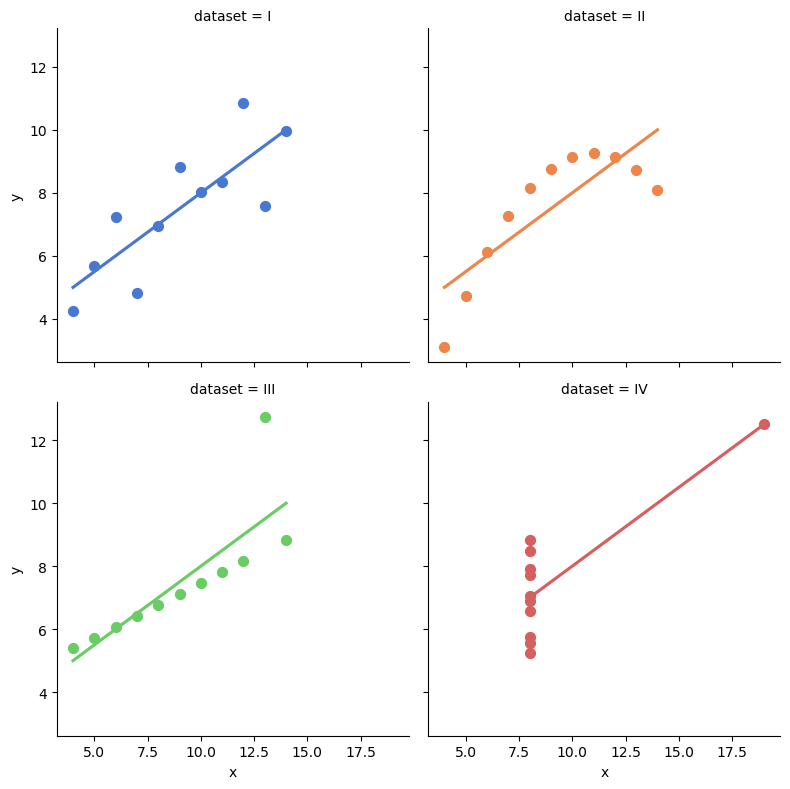

In [18]:
anscombe = sns.load_dataset("anscombe")

sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=anscombe, 
           col_wrap=2, ci=None, palette="muted", height=4, scatter_kws={"s": 50, "alpha": 1})
plt.show()

## Residual vs fitted value plot 

A useful diagnostic tool is the **residual vs fitted value plot**. The idea is that under the assumption that the error term $\boldsymbol{\varepsilon} \sim N(\boldsymbol{0}, \sigma^2 I)$, the residuals should scatter randomly around the regression line.  

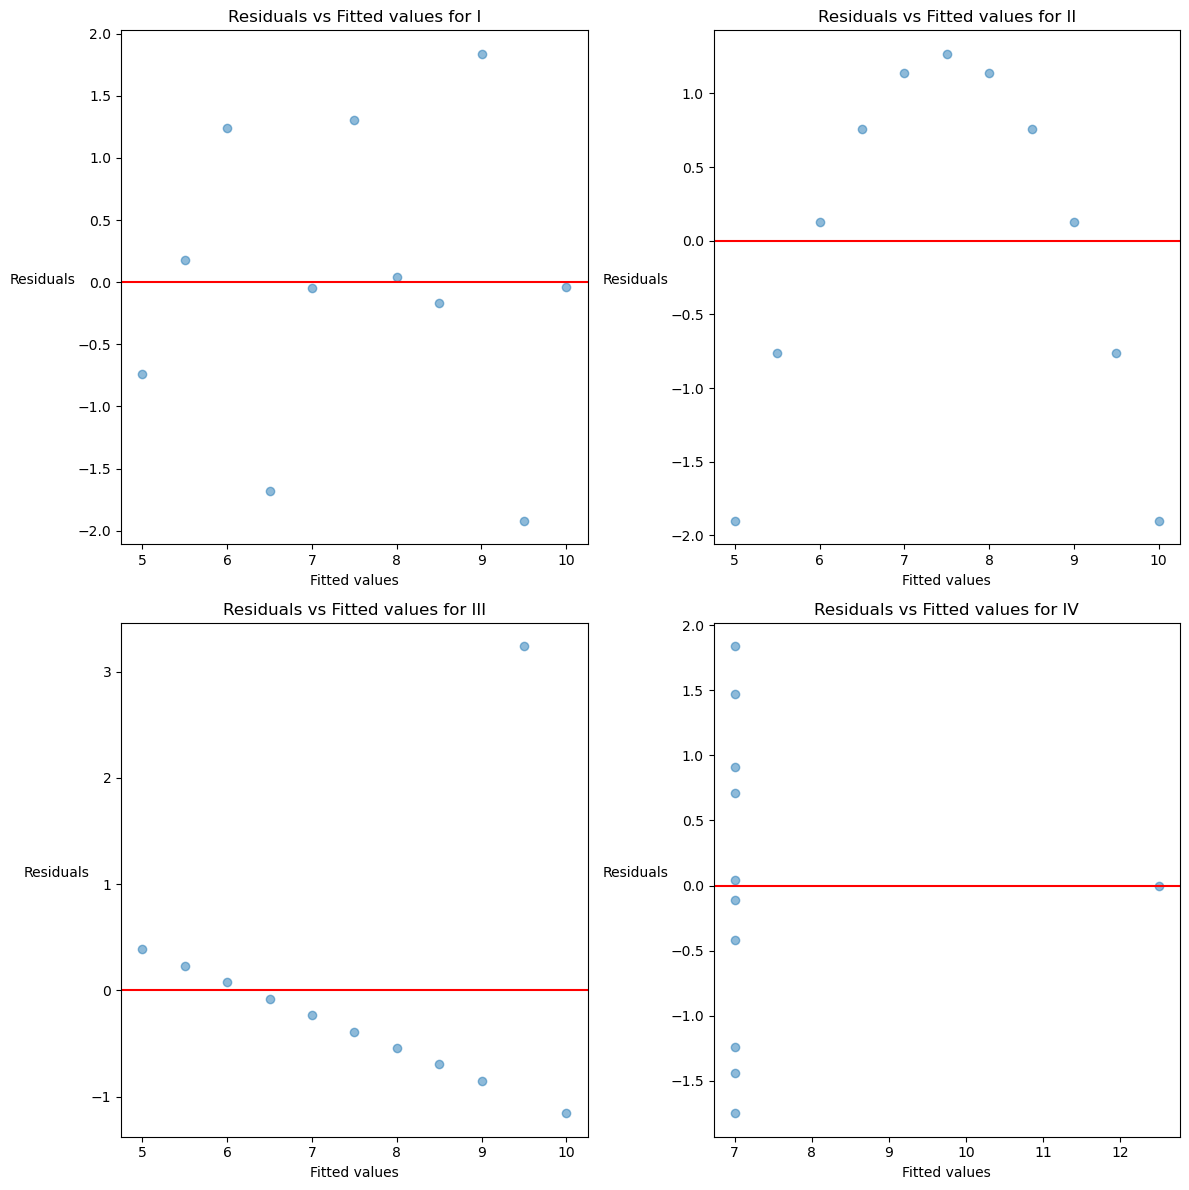

In [19]:
anscombe_group = anscombe.groupby('dataset')
group_I = anscombe_group.get_group('I')
group_II = anscombe_group.get_group('II')
group_III = anscombe_group.get_group('III')
group_IV = anscombe_group.get_group('IV')

datasets = [group_I, group_II, group_III, group_IV]

fig, axes = plt.subplots(2, 2, figsize=(12, 12))

for ax, data in zip(axes.flatten(), datasets):
    X = data['x'].values.reshape(-1, 1)
    y = data['y'].values
    
    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)
    residuals = y - y_pred
    
    ax.scatter(y_pred, residuals, alpha=0.5)
    ax.axhline(y=0, color='red')
    ax.set_xlabel('Fitted values')
    ax.set_ylabel('Residuals', rotation=0, labelpad=25)
    ax.set_title(f'Residuals vs Fitted values for {data["dataset"].iloc[0]}')

plt.tight_layout()
plt.show()

Here we only see random scattering in the first plot, indicating that the linear model is a good fit.

If the residual plot suggests that there is a functional relationship between the residuals and the fitted values, then this likely suggests that some signal in the data is missed by your model, and that the model is not a good fit.

Another use of the residual plot is to check for *heteroscedasticity*, which is when the variance of the residuals is not constant. This can be seen in the second plot, where the residuals are more spread out as the fitted values increase. 

One way to address heteroscedasticity is to perform *weighted least squares regression*. A detailed discussion of this can be found [here](https://www.stat.cmu.edu/~cshalizi/uADA/16/lectures/08.pdf).

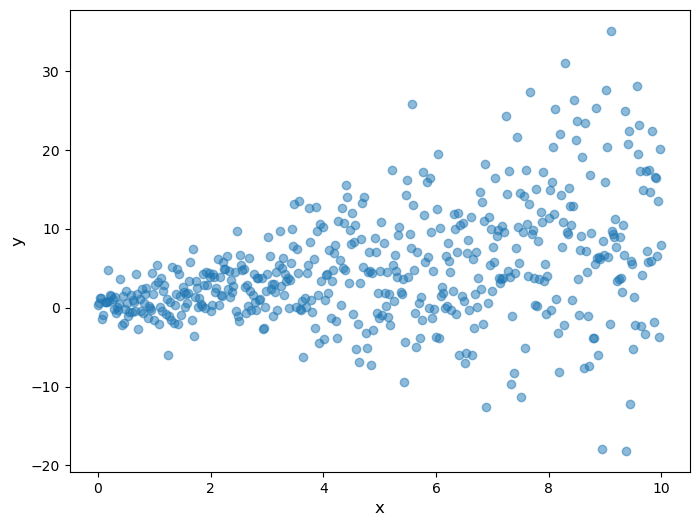

In [20]:
x = np.linspace(0, 10, 500)
eps = (x+1)*np.random.randn(500)

y = x + eps

plt.figure(figsize=(8,6))
plt.scatter(x, y, alpha=0.5)
plt.xlabel("x", fontsize=12)
plt.ylabel("y", fontsize=12)

plt.show()

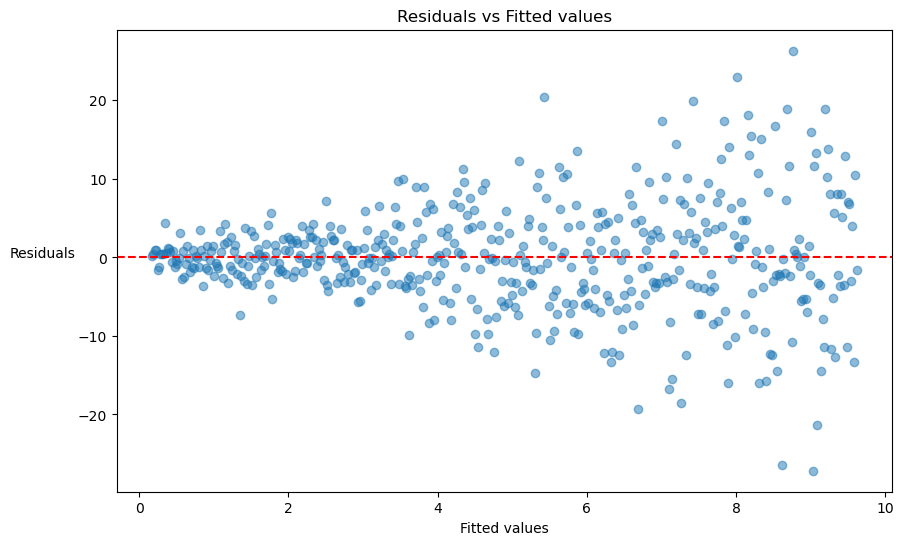

In [21]:
model = LinearRegression()
model.fit(x.reshape(-1,1), y)
y_pred = model.predict(x.reshape(-1,1))
residuals = y - y_pred

# Plot residuals against fitted values
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Fitted values')
plt.ylabel('Residuals', rotation=0, labelpad=25)
plt.title('Residuals vs Fitted values')
plt.show()

From here we see that the variance of the residuals is not constant across the fitted values, which suggests that the model is not a good fit.

## The normal probability plot

Another useful diagnostic tool is the **normal probability plot**, which is used to assess whether the residuals are normally distributed. The normal probability plot is a special version of a **quantile-quantile plot** or a **QQ plot** that is used to compare the quantiles of the residuals to the quantiles of a normal distribution. 

The idea is as follows: we sort the sample values versus the theoretical quantiles of a distribution. More specifically, one plots the $i$-th ordered statistic verses the $100(i/ (n+1))\%$-th percentile of the distribution. If the samples were drawn from the same distribution, then the plot should show a 45-degree line. If the distributions are linearly related, then the plot should show a straight line.

In Python, the plot can be generated using ``scipy.stats.probplot``. Below we give a quick demonstration.

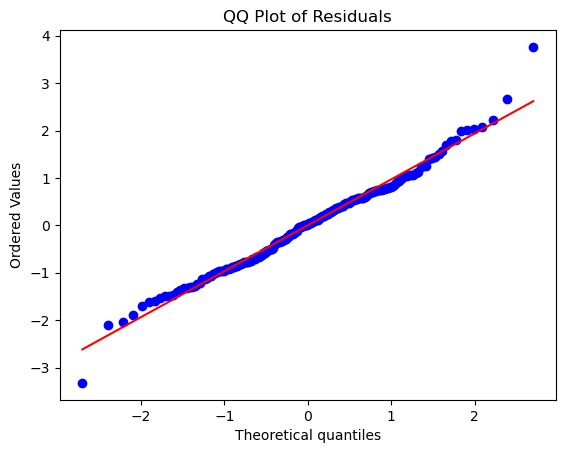

In [22]:
from scipy.stats import probplot

np.random.seed(42)
X = 2 * np.random.rand(200, 1)
y = 4 + 3 * X + np.random.randn(200, 1)

reg = LinearRegression()
reg.fit(X, y)
y_pred = reg.predict(X)
residuals = y - y_pred

probplot(residuals.flatten(), dist="norm", plot=plt)
plt.title('QQ Plot of Residuals')
plt.show()

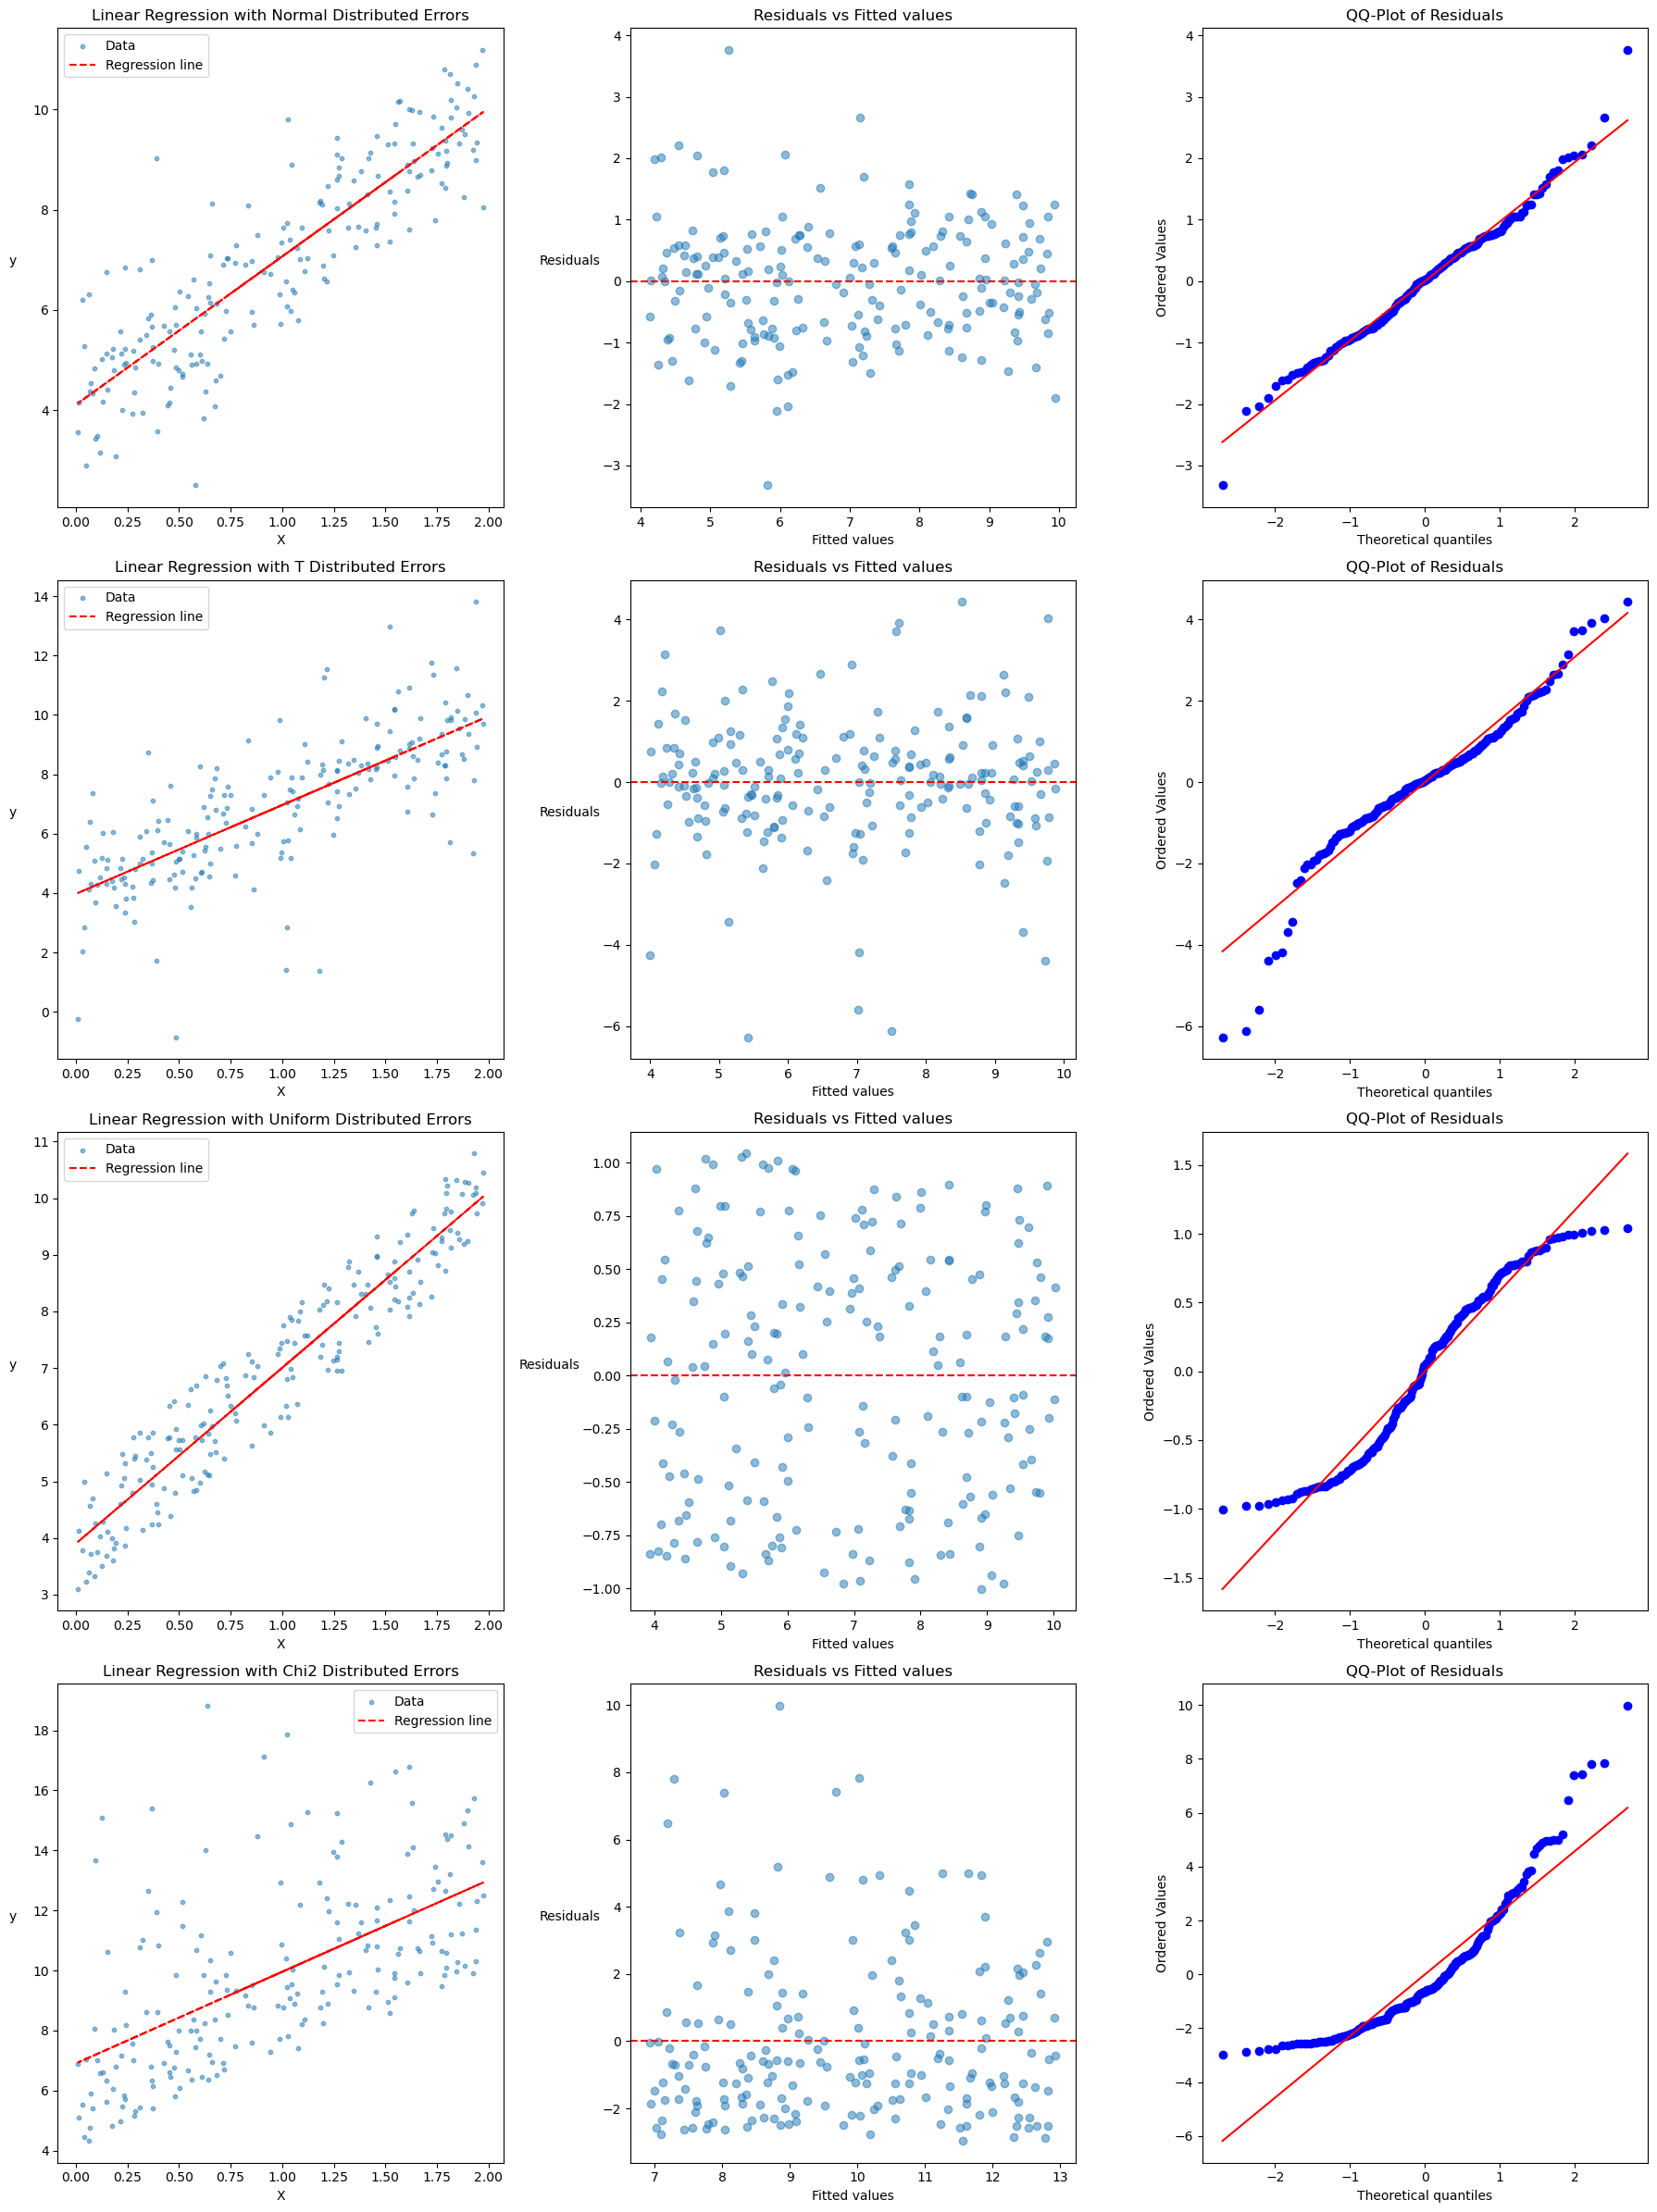

In [23]:
np.random.seed(42)
X = 2 * np.random.rand(200, 1)

distributions = {
    'normal': np.random.randn(200, 1),
    't': np.random.standard_t(df=3, size=(200, 1)),
    'uniform': np.random.uniform(-1, 1, size=(200, 1)),
    'chi2': np.random.chisquare(df=3, size=(200, 1))
}

fig, axes = plt.subplots(4, 3, figsize=(18, 24))

for i, (dist_name, dist_data) in enumerate(distributions.items()):
    y = 4 + 3 * X + dist_data
    reg = LinearRegression()
    reg.fit(X, y)
    y_pred = reg.predict(X)
    residuals = y - y_pred

    axes[i, 0].scatter(X, y, alpha=0.5, s=10, label='Data')
    axes[i, 0].plot(X, y_pred, color='red', linestyle='dashed', label='Regression line')
    axes[i, 0].set_xlabel('X')
    axes[i, 0].set_ylabel('y', rotation=0, labelpad=15)
    axes[i, 0].set_title(f'Linear Regression with {dist_name.capitalize()} Distributed Errors')
    axes[i, 0].legend()

    axes[i, 1].scatter(y_pred, residuals, alpha=0.5)
    axes[i, 1].axhline(y=0, color='red', linestyle='--')
    axes[i, 1].set_xlabel('Fitted values')
    axes[i, 1].set_ylabel('Residuals', rotation=0, labelpad=25)
    axes[i, 1].set_title('Residuals vs Fitted values')

    probplot(residuals.flatten(), dist="norm", plot=axes[i, 2])
    axes[i, 2].set_title('QQ-Plot of Residuals')

plt.tight_layout()
plt.show()
